### 분류(Classification)와 군집화(Clustering)
- 분류 : 주어진 데이터 집합을 이미 정의된 몇 개의 클래스로 구분하는 
         문제 지도학습(Supervised Learning)
         숫자인식, 얼굴인식 등
         Bayes classifier, k-Nearest Neighbor, Support Vector Machine 등
         
- 군집 : 입력 데이터의 분포 특성(입력값의 유사성)을 분석하여 
         임의의 복수개의 그룹으로 나누는 것
         비지도학습(Unsupervised Learning)
         영상분리
         K-means clustering, Learning Vector Quantization, SOM 등

### 표준 라이브러리 로딩

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고무시
import warnings
warnings.filterwarnings('ignore')

### 데이터 로딩

In [2]:
train = pd.read_csv("D:/python3/data/titanic_train.csv")
test = pd.read_csv("D:/python3/data/titanic_test.csv")
train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.0,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.0,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."


### 데이터셋의 피처
- pclass : Passenger Class, 승객등급(1-1st, 2-2nd, 3-3rd)
- survived : 생존여부(생존 1, 사망 0)
- name : 승객 이름
- sex : 승객 성별
- age : 승객 나이
- sibsp : 동승한 형제자매 또는 배우자 수
- parch : 동승한 부모 또는 자녀의 수
- ticket : 티켓 번호
- fare : 승객 지불 요금
- cabin : 선실 이름
- embarked : 승선항(C-쉘부르크, Q-퀸즈, S-사우스햄튼)
- body : 사망자 확인 번호
- home.dest : 고향/목적지

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 13 columns):
pclass       916 non-null int64
survived     916 non-null int64
name         916 non-null object
sex          916 non-null object
age          741 non-null float64
sibsp        916 non-null int64
parch        916 non-null int64
ticket       916 non-null object
fare         916 non-null float64
cabin        214 non-null object
embarked     914 non-null object
body         85 non-null float64
home.dest    527 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 93.1+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 13 columns):
pclass       393 non-null int64
survived     393 non-null int64
name         393 non-null object
sex          393 non-null object
age          305 non-null float64
sibsp        393 non-null int64
parch        393 non-null int64
ticket       393 non-null object
fare         393 non-null float64
cabin        81 non-null object
embarked     393 non-null object
body         36 non-null float64
home.dest    218 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 40.0+ KB


In [5]:
# 불필요한 피처를 제거하는 작업     # name, ticket, cabin, body, home.dest
train = train.drop(['name', 'ticket', 'cabin', 'body', 'home.dest'], axis=1)
test = test.drop(['name', 'ticket', 'cabin', 'body', 'home.dest'], axis=1)

### 데이터 탐색과 시각화

In [6]:
train['survived'].value_counts()

0    563
1    353
Name: survived, dtype: int64

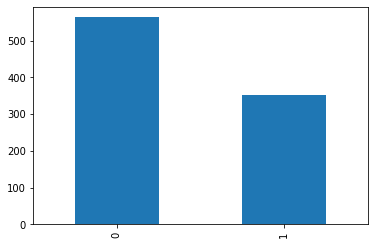

In [7]:
train['survived'].value_counts().plot.bar()

### 전체 데이터의 분포를 시각화(Pie chart)
#### Pie chart for Categorical feature
- sex
- pclass
- embarked

In [8]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    
    survived = train[train['survived']==1][feature].value_counts()
    dead = train[train['survived']==0][feature].value_counts()
    
    plt.plot(aspect='auto')   # 자동으로 그려줌..?
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature + "\'s ratio in total")
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size + 1, i+1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survived', 'Dead'], autopct='%1.1f%%')
        plt.title(str(index) + "\'s ratio")
    
    plt.show()

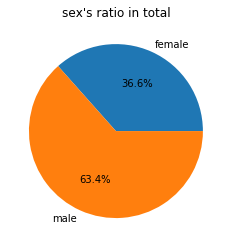

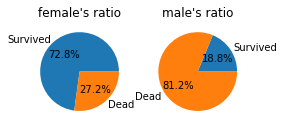

In [9]:
pie_chart('sex')

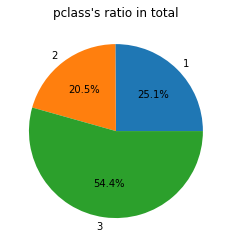

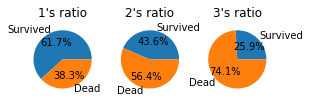

In [10]:
pie_chart('pclass')

3    498
1    230
2    188
Name: pclass, dtype: int64


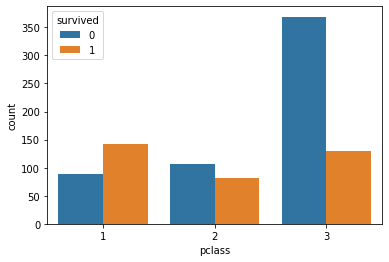

In [11]:
print(train['pclass'].value_counts())
ax = sns.countplot(x='pclass', hue='survived', data=train)

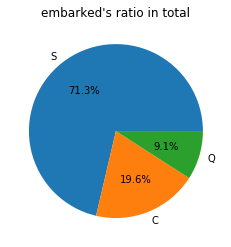

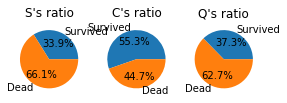

In [12]:
pie_chart('embarked')

### Bar Chart for Categorical feature
- sibsp
- parch

In [13]:
def bar_chart(feature):
    survived = train[train['survived']==1][feature].value_counts()
    dead = train[train['survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar', stacked=True, figsize=(10, 5))

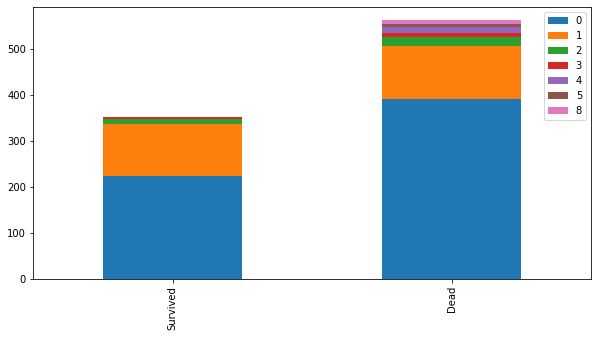

In [14]:
bar_chart('sibsp')

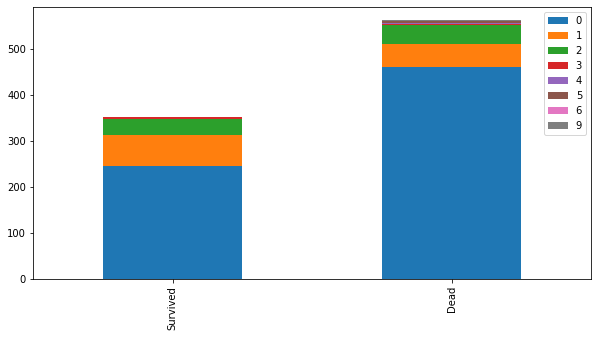

In [15]:
bar_chart('parch')

### 데이터 전처리 및 특성 추출

In [16]:
train.describe()

,pclass,survived,age,sibsp,parch,fare
count,916.000000,916.000000,741.000000,916.000000,916.000000,916.000000
mean,2.292576,0.385371,30.231444,0.532751,0.371179,32.532050
std,0.842576,0.486949,13.934240,1.125957,0.837508,47.416524
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,74.000000,8.000000,9.000000,512.329200


### age, sibsp 수치형 피처 탐색
- 두 그룹간의 분포를 시각화
- 두 그룹 각각의 표준편차를 시각화
- 두 그룹간의 t-Test 검정 (전제조건 - 정규분포에 따라야 한다)
- 정규분포를 검정 : Shapiro-wilk 검정

In [17]:
from scipy import stats

# 두 집단의 작업을 자동화하는 함수 구현
def valid_features(df, col_name, distribution_check = True):
    
    # 분포의 시각화(survived = 1, survived = 0)
    g = sns.FacetGrid(df, col= 'survived')
    g.map(plt.hist, col_name, bins = 30) # map으로 묶기 막대기 넓이 30
    
    # 표준편차
    titanic_survived = df[df['survived'] == 1]
    titanic_survived_static = np.array(titanic_survived[col_name])
    print('data std is', '%.2f'%np.std(titanic_survived_static))
    
    titanic_dead = df[df['survived'] == 0]
    titanic_dead_static = np.array(titanic_dead[col_name])
    print('data std is', '%.2f'%np.std(titanic_dead_static))
    
    # T - test : 평균차이를 검증 -> 정규분포 아니면 shapiro로 정규분포 확인을 한다.
    tTestResult = stats.ttest_ind(titanic_survived[col_name], 
                                  titanic_dead[col_name])# 분산이 같다.
    tTestResultDiffVar = stats.ttest_ind(titanic_survived[col_name], 
                                  titanic_dead[col_name], equal_var = False)#분산이 같지 않다
    print('T-test 통계량 : %.3f and p-value : %.3f' %tTestResult)
    print('T-test 통계량 : %.3f and p-value : %.3f' %tTestResultDiffVar)
    
    if distribution_check:
        # Shapiro-wilk 검정
        print('Shapiro-wilk 통계량[survived] : %.3f and p-value : %.3f' % stats.shapiro(titanic_survived[col_name]))
        print('Shapiro-wilk 통계량[dead] : %.3f and p-value : %.3f' % stats.shapiro(titanic_dead[col_name]))

data std is 0.64
data std is 1.34
T-test 통계량 : -2.118 and p-value : 0.034
T-test 통계량 : -2.446 and p-value : 0.015
Shapiro-wilk 통계량[survived] : 0.656 and p-value : 0.000
Shapiro-wilk 통계량[dead] : 0.492 and p-value : 0.000


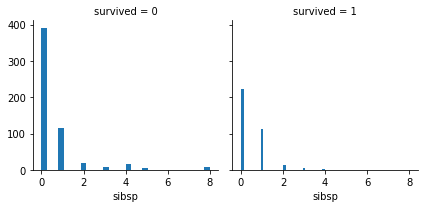

In [18]:
valid_features(train, 'sibsp', distribution_check=True)

### age feature
- 결측값 처리 : 제거, 대체(평균, 최빈값, 중앙값)
- 연령대

In [19]:
replace_mean = train[train['age']>0]['age'].mean()
replace_mean

30.23144399460189

In [20]:
train['age'] = train['age'].fillna(replace_mean)
test['age'] = test['age'].fillna(replace_mean)

### embarked feature
- 최빈값

In [21]:
embarked_mode = train['embarked'].value_counts().index[0]
train['embarked'] = train['embarked'].fillna(embarked_mode)
test['embarked'] = test['embarked'].fillna(embarked_mode)

### one-hot encoding(원-핫 인코딩)
- 범주형 변수를 변환 (모델링을 컴퓨터가 학습할 수 있도록 0,1로 바꿔줌)
- sex, embarked

In [22]:
print(len(train), len(test))

916 393


In [23]:
# 현재 데이터셋 = train data + test data
whole_df = train.append(test)
train_idx_num = len(train)

whole_df_encoded = pd.get_dummies(whole_df)
train = whole_df_encoded[:train_idx_num]
test = whole_df_encoded[train_idx_num:]

train.head()

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,1,0,0,0,1
1,2,1,4.000000,1,1,23.0000,1,0,0,0,1
2,2,1,30.000000,1,0,13.8583,1,0,1,0,0
3,3,0,30.231444,0,0,7.7250,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,1,0,0,1,0


### 로지스틱 회귀분석 모델링
- Logistic Regression
- https://nittaku.tistory.com/478
- 어떤 사건이 발생할지에 대한 직접 예측이 아니라 그 사건이 발생할 확률을 예측하는 것
- 두 개의 값만을 가지는 종속변수와 독립변수들 간의 인과관계를 로지스틱 함수를 이용하여 추정하는 통계기법

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### 분류 모델의 평가 지표
- Confusion Matrix(교차분할표) or 분류정확도를 이용하여 모델을 평가
- 교차분할행렬에 예측값(predicted class)와 실측값(actual class)로 구성
- 정확도(accuracy) : TP+TN / TP+TN+FP+FN
- 정밀도(precision) : TP / TP+FP
- 재현도(recall) : TP / TP+FN
- f1_score : 정밀도와 재현도(민감도)의 조화평균값. 
             즉, 두 값을 동시에 고려할 때 사용하는 지표

In [25]:
# 데이터를 학습데이터와 테스트 데이터로 분류
X_train, y_train = train.loc[:,train.columns!='survived'
                            ].values, train['survived'].values
X_test, y_test = test.loc[:,test.columns!='survived'
                            ].values, test['survived'].values

In [26]:
# 로지스틱 회귀 모델 학습
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [27]:
# 학습 모델의 테스트 데이터셋에 대한 예측 결과 반환
y_pred = lr.predict(X_test)                         # 예측된 값
y_pred_probability = lr.predict_proba(X_test)[:,1]   # 예측된 확률값

### 분류 모델 평가

In [28]:
# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가지표
print("accuracy : %.2f" % accuracy_score(y_test, y_pred))     # 정확도
print("precision : %.2f" % precision_score(y_test, y_pred))   # 정밀도
print("recall : %.2f" % recall_score(y_test, y_pred))         # 재현도
print("f1 : %.2f" % f1_score(y_test, y_pred))                 # 정밀+재현 조화평균

accuracy : 0.80
precision : 0.76
recall : 0.67
f1 : 0.71


In [29]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix(혼동행렬)
confmat = confusion_matrix(y_true = y_test, y_pred=y_pred)
confmat

array([[214,  32],
       [ 48,  99]], dtype=int64)

AUC score : 0.838


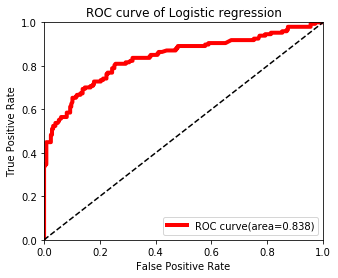

In [30]:
# 로지스틱 회귀 모델의 AUC 구하는 작업
from sklearn.metrics import roc_curve, roc_auc_score

# AUC(Area Under the Curve)                  # thresholds 임계값
false_positive_rate, true_positive_rate, thresholds = roc_curve(
    y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC score : %.3f' % roc_auc)

# ROC curve 그래프
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve(area=%0.3f)' 
         % roc_auc, color='r', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc='lower right')
plt.show()

### Decision Tree(의사결정 나무)
- 로지스틱 회귀 모델과 더불어 분류 분석의 대표적인 모델
- 해석력이 좋다는 장점
- 스무고개 
- https://ratsgo.github.io/machine%20learning/2017/03/26/tree/

In [31]:
from sklearn.tree import DecisionTreeClassifier

# 학습, 모델 테스트, 예측값
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)
y_pred_probability = dtc.predict_proba(X_test)[:,1]

print("accuracy : %.2f" % accuracy_score(y_test, y_pred))
print("precision : %.2f" % precision_score(y_test, y_pred))
print("recall : %.2f" % recall_score(y_test, y_pred)) 
print("f1 : %.2f" % f1_score(y_test, y_pred))   

accuracy : 0.75
precision : 0.69
recall : 0.63
f1 : 0.65


AUC score : 0.742


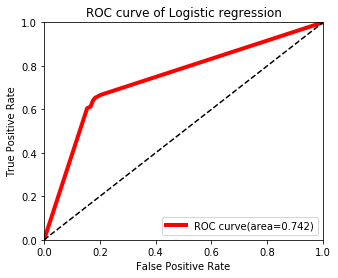

In [32]:
# 의사결정나무 모델의 AUC 구하는 작업
from sklearn.metrics import roc_curve, roc_auc_score

# AUC(Area Under the Curve)                  # thresholds 임계값
false_positive_rate, true_positive_rate, thresholds = roc_curve(
    y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC score : %.3f' % roc_auc)

# ROC curve 그래프
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve(area=%0.3f)' 
         % roc_auc, color='r', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc='lower right')
plt.show()

### 타이타닉 모델링
- Logistic Regression
- Support Vector Machine(SVM)
- k-Nearest Neighbor(kNN)
- Random Forest
- Native Bayes

In [33]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.utils import shuffle

In [34]:
# 데이터를 학습데이터와 테스트 데이터로 분류
X_train, y_train = shuffle(train.loc[:,train.columns!='survived'
                            ].values, train['survived'].values)
X_test, y_test = shuffle(test.loc[:,test.columns!='survived'
                            ].values, test['survived'].values)

In [35]:
def train_and_test(model):
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    accuracy = round(model.score(X_train, y_train)*100, 2)
    print('Accuracy : ', accuracy)
    return prediction

In [36]:
# Logistic Regression
log_pred = train_and_test(LogisticRegression())
# SVM
svm_pred = train_and_test(SVC())
# kNN
knn_pred_4 = train_and_test(KNeighborsClassifier(n_neighbors=4))
# Random Forest
rf_pred = train_and_test(RandomForestClassifier(n_estimators=100))
# Naive Bayes
nb_pred = train_and_test(GaussianNB())

Accuracy :  78.6
Accuracy :  66.7
Accuracy :  79.91
Accuracy :  97.6
Accuracy :  78.28


### 피처 엔지니어링
- https://blog.ggaman.com/1010
- 분류 모델의 성능을 높이기 위해서 하는 것
- 피처 엔지니어링 : 모델에서 사용할 피처를 가공하는 분석 작업
- 수치형 : 결측값 처리, 이상치 처리
- 범주형 : 원-핫 인코딩

In [37]:
# 데이터 다시 불러오기
train = pd.read_csv('D:/python3/data/titanic_train.csv')
test = pd.read_csv('D:/python3/data/titanic_test.csv')

# 불필요한 피처 제거
train = train.drop(['ticket','body','home.dest'], axis=1)
test = test.drop(['ticket','body','home.dest'], axis=1)

# 결측값 처리
replace_mean = train[train['age']>0]['age'].mean()
train['age'] = train['age'].fillna(replace_mean)
test['age'] = test['age'].fillna(replace_mean)

embarked_mode = train['embarked'].value_counts().index[0]
train['embarked'] = train['embarked'].fillna(embarked_mode)
test['embarked'] = test['embarked'].fillna(embarked_mode)

# 원-핫 인코딩
whole_df = train.append(test)
train_idx_num = len(train)

### cabin 피처

In [38]:
whole_df['cabin'].value_counts()[:10]

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F4                 4
B96 B98            4
C78                4
C22 C26            4
D                  4
F33                4
F2                 4
Name: cabin, dtype: int64

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 916 entries, 0 to 915
Data columns (total 10 columns):
pclass      916 non-null int64
survived    916 non-null int64
name        916 non-null object
sex         916 non-null object
age         916 non-null float64
sibsp       916 non-null int64
parch       916 non-null int64
fare        916 non-null float64
cabin       214 non-null object
embarked    916 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 71.6+ KB


In [40]:
train.head(10)

,pclass,survived,name,sex,age,sibsp,parch,fare,cabin,embarked
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.000000,0,1,19.5000,NaN,S
1,2,1,"Wells, Miss. Joan",female,4.000000,1,1,23.0000,NaN,S
2,2,1,"Duran y More, Miss. Florentina",female,30.000000,1,0,13.8583,NaN,C
3,3,0,"Scanlan, Mr. James",male,30.231444,0,0,7.7250,NaN,Q
4,3,1,"Bradley, Miss. Bridget Delia",female,22.000000,0,0,7.7250,NaN,Q
5,3,0,"Linehan, Mr. Michael",male,30.231444,0,0,7.8792,NaN,Q
6,1,1,"Francatelli, Miss. Laura Mabel",female,30.000000,0,0,56.9292,E36,C
7,2,1,"Quick, Miss. Phyllis May",female,2.000000,1,1,26.0000,NaN,S
8,1,0,"Thayer, Mr. John Borland",male,49.000000,1,1,110.8833,C68,C
9,1,1,"Silverthorne, Mr. Spencer Victor",male,35.000000,0,0,26.2875,E24,S


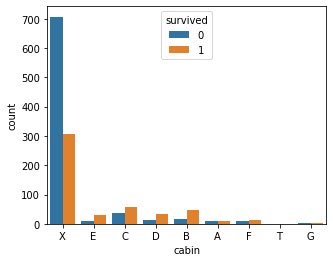

In [41]:
# 결측데이터는 'X'로 대체
whole_df['cabin'] = whole_df['cabin'].fillna('X')

# cabin 피처의 첫번째 알파벳을 추출
whole_df['cabin'] = whole_df['cabin'].apply(lambda x: x[0])

ax = sns.countplot(x='cabin', hue='survived', data=whole_df)
plt.show()

In [42]:
# 추출한 'G'나 'T'를 'X'로 대체 (G,T 너무 적어서 그냥 버림..)
whole_df['cabin'] = whole_df['cabin'].replace({'G':'X', 'T':'X'})

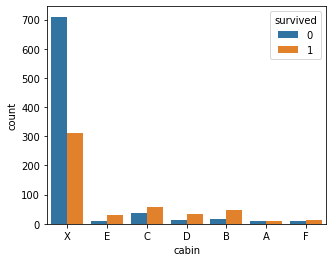

In [43]:
ax = sns.countplot(x='cabin', hue='survived', data=whole_df)
plt.show()

### name 피처

In [44]:
# 이름에서 호칭(이름 중간에 있는 것,,) 추출
name_grade = whole_df['name'].apply(lambda x: x.split(',', 1)[1].split('.')[0])
name_grade = name_grade.unique().tolist()
name_grade

[' Miss',
 ' Mr',
 ' Master',
 ' Mrs',
 ' Dr',
 ' Mlle',
 ' Col',
 ' Rev',
 ' Ms',
 ' Mme',
 ' Sir',
 ' the Countess',
 ' Dona',
 ' Jonkheer',
 ' Lady',
 ' Major',
 ' Don',
 ' Capt']

In [45]:
# 호칭에 따라 그루핑
grade_dict = {'A':['Rev', 'Col', 'Major', 'Dr', 'Capt', 'Sir'],
             'B':['Ms', 'Mme', 'Mrs', 'Dona'],
             'C':['Jonkheer', 'the Countess'],
             'D':['Mr', 'Don'],
             'E':['Master'],
             'F':['Miss', 'Mlle', 'Lady']}

In [46]:
def give_grade(x):
    grade = x.split(', ', 1)[1].split('.')[0]
    
    for key, value in grade_dict.items():
        for title in value:
            if grade == title:
                return key
    return 'G'

whole_df['name'] = whole_df['name'].apply(lambda x: give_grade(x))

whole_df['name'].value_counts()

D    758
F    263
B    201
E     61
A     24
C      2
Name: name, dtype: int64

In [47]:
# 원-핫 인코딩
whole_df_encoded = pd.get_dummies(whole_df)
train = whole_df_encoded[:train_idx_num]
test = whole_df_encoded[train_idx_num:]

train.head()

,pclass,survived,age,sibsp,parch,fare,name_A,name_B,name_C,name_D,...,cabin_A,cabin_B,cabin_C,cabin_D,cabin_E,cabin_F,cabin_X,embarked_C,embarked_Q,embarked_S
0,2,1,13.000000,0,1,19.5000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,4.000000,1,1,23.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2,1,30.000000,1,0,13.8583,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
3,3,0,30.231444,0,0,7.7250,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
4,3,1,22.000000,0,0,7.7250,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


accuracy : 0.79
precision : 0.74
recall : 0.70
f1 : 0.72
AUC score : 0.853


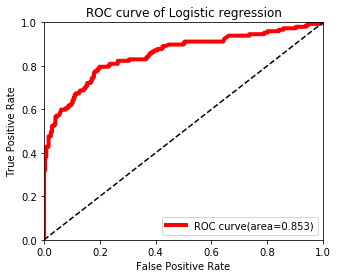

In [48]:
# 데이터를 학습데이터와 테스트 데이터로 분류
X_train, y_train = train.loc[:,train.columns!='survived'
                            ].values, train['survived'].values
X_test, y_test = test.loc[:,test.columns!='survived'
                            ].values, test['survived'].values

# 로지스틱 회귀 모델 학습
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

# 학습 모델의 테스트 데이터셋에 대한 예측 결과 반환
y_pred = lr.predict(X_test)                         # 예측된 값
y_pred_probability = lr.predict_proba(X_test)[:,1]   # 예측된 확률값

# 테스트 데이터셋에 대한 정확도, 정밀도, 특이도, f1 평가지표
print("accuracy : %.2f" % accuracy_score(y_test, y_pred))     # 정확도
print("precision : %.2f" % precision_score(y_test, y_pred))   # 정밀도
print("recall : %.2f" % recall_score(y_test, y_pred))         # 재현도
print("f1 : %.2f" % f1_score(y_test, y_pred))                 # 정밀+재현 조화평균

# 로지스틱 회귀 모델의 AUC 구하는 작업
from sklearn.metrics import roc_curve, roc_auc_score

# AUC(Area Under the Curve)                  # thresholds 임계값
false_positive_rate, true_positive_rate, thresholds = roc_curve(
    y_test, y_pred_probability)
roc_auc = roc_auc_score(y_test, y_pred_probability)
print('AUC score : %.3f' % roc_auc)

# ROC curve 그래프
plt.rcParams['figure.figsize'] = [5, 4]
plt.plot(false_positive_rate, true_positive_rate, label='ROC curve(area=%0.3f)' 
         % roc_auc, color='r', linewidth=4.0)
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of Logistic regression')
plt.legend(loc='lower right')
plt.show()

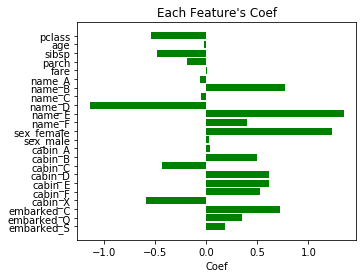

In [54]:
# 피처의 영향력을 파악 : 분류 모델의 피처 영향력을 시각화

## 예측 대상인 survived 피처를 제외한 다른 피처를 리스트로 반환
cols = train.columns.tolist()
cols.remove('survived')
y_pos = np.arange(len(cols))

# 각 피처들의 회귀 분석 계수를 그래프의 x축으로 하여 시각화
plt.rcParams['figure.figsize'] = [5, 4]
fig, ax = plt.subplots()
ax.barh(y_pos, lr.coef_[0], align='center', color='green', ecolor='black')# 계수, 절편값
ax.set_yticks(y_pos)
ax.set_yticklabels(cols)
ax.invert_yaxis()
ax.set_xlabel('Coef')
ax.set_title("Each Feature's Coef")
plt.show()

### K-Fold 교차검증(Cross Validation)
- 마지막 단계에서 완성된 분류 모델을 검증하는 단계
- 모델의 과적합 여부 검증(K-Fold 교차검증, 학습곡선)
- 가지고 있는 데이터세트를 훈련세트와 테스트세트로 번갈아 여러번 모델을 만들어 검증하는것
- 훈련세트와 테스트세트를 나눌 때, 두 데이터의 불규형을 낮추는 방법
- Stratified K-Fold : K-Fold의 단점을 보안한 검증 방법

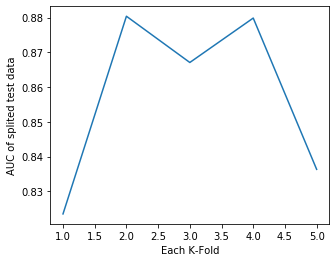

In [55]:
from sklearn.model_selection import KFold
# KFold 교차검증의 k값을 5로 설정(n_splits=5)
k = 5
cv = KFold(k, shuffle=True, random_state=0)   # 전체를 몇 개로 나눌거냐, 섞기,,

auc_history = []

# K-Fold를 5번 분할, 학습하는 작업을 반복한다  # 정제가 끝난 데이터로...
for i, (train_data_row, test_data_row) in enumerate(cv.split(whole_df_encoded)):
    
    # 5개로 분할된 fold 중에 4개는 학습데이터, 1개는 테스트데이터
    df_train = whole_df_encoded.iloc[train_data_row]
    df_test = whole_df_encoded.iloc[test_data_row]
    
    # 데이터를 학습데이터와 테스트 데이터로 분류
    X_train, y_train = df_train.loc[:,df_train.columns!='survived'
                                ].values, df_train['survived'].values
    X_test, y_test = df_test.loc[:,df_test.columns!='survived'
                                ].values, df_test['survived'].values
    
    # 로지스틱 회귀모델 학습
    lr = LogisticRegression(random_state=0)
    lr.fit(X_train, y_train)
    
    y_pred = lr.predict(X_test)
    y_pred_probability = lr.predict_proba(X_test)[:,1]
    
    # 테스트 데이터셋 AUC 계산한 후, auc_history에 저장
    # AUC(Area Under the Curve)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(
        y_test, y_pred_probability)
    roc_auc = roc_auc_score(y_test, y_pred_probability)    
    auc_history.append(roc_auc)
    
#auc_history에 저장된 다섯번의 학습결과(AUC)를 시각화
plt.xlabel('Each K-Fold')
plt.ylabel('AUC of splited test data')
plt.plot(range(1, k+1), auc_history)
plt.show()

- 데이터의 개수가 적어서 발생하는 문제
- 모든 실행에서 공통적으로 AUC 0.8이상이면, 과적합을 의심해볼 수 있다

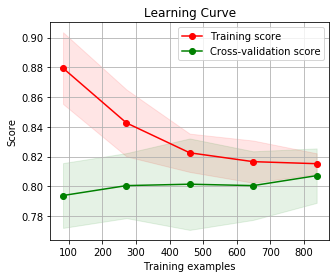

In [58]:
# 학습곡선
# pip install scikit-plot
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr, X_train, y_train)
plt.show()